## A Whilwind Introduction to the RDKit for Cheminformatics

In this notebook, we'll provide a quick overview of a few the RDKit and how it can be used from a Jupyter notebook.  In a Jupyter notebook, there are two types of cells, text cells have a white background and code cells have a grey background.  To execute a code cell, hold down the sift key and hit return.  This will execute the code and move to next cell. 

Install the necessary Python libraries

In [29]:
!pip install rdkit-pypi pandas seaborn

Import the necessary Python libraries

In [19]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframegrid
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid

### Displaying a chemical structure

Create a molecule (benzene) from a SMILES string and put the molecule into a variable called **mol**. 

In [20]:
mol = Chem.MolFromSmiles("c1ccccc1")

We can display value of variable in a jupyter notebook by typing the variable name and clicking shift-return. 

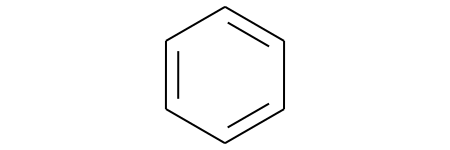

In [25]:
mol

The SMILES representations for most marketed drugs are available from the Wikipedia page for the corresponding drug.  For instance, we can we SMILES for the oncology drug Imatinib (aka Gleevec) from [Wikipedia](https://en.wikipedia.org/wiki/Imatinib). With this SMILES string in hand, we can generate an RDKit molecule. 

In [23]:
glvc = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")

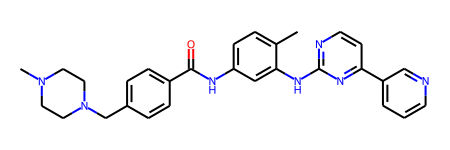

In [24]:
glvc

### Reading Multiple Chemical Structures
The RDKit also provides the ability to read molecules from common molecular structure formats.  In the code below we us the RDKit's [SDMolSupplier](https://www.rdkit.org/docs/cppapi/classRDKit_1_1SDMolSupplier.html) to read molecules from an [SD file](https://en.wikipedia.org/wiki/Chemical_table_file). 

In [6]:
mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

The code above reads the molecules into a list.  When we display this, we see a list of molecule objects.  Below we'll take a look at a couple of ways to display a multiple chemical structures in a grid. 

In [7]:
mols

### Displaying Multiple Chemical Structures in a Grid
The RDKit's builtin [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html) method provids a convenient way of displaying a grid of structures. 

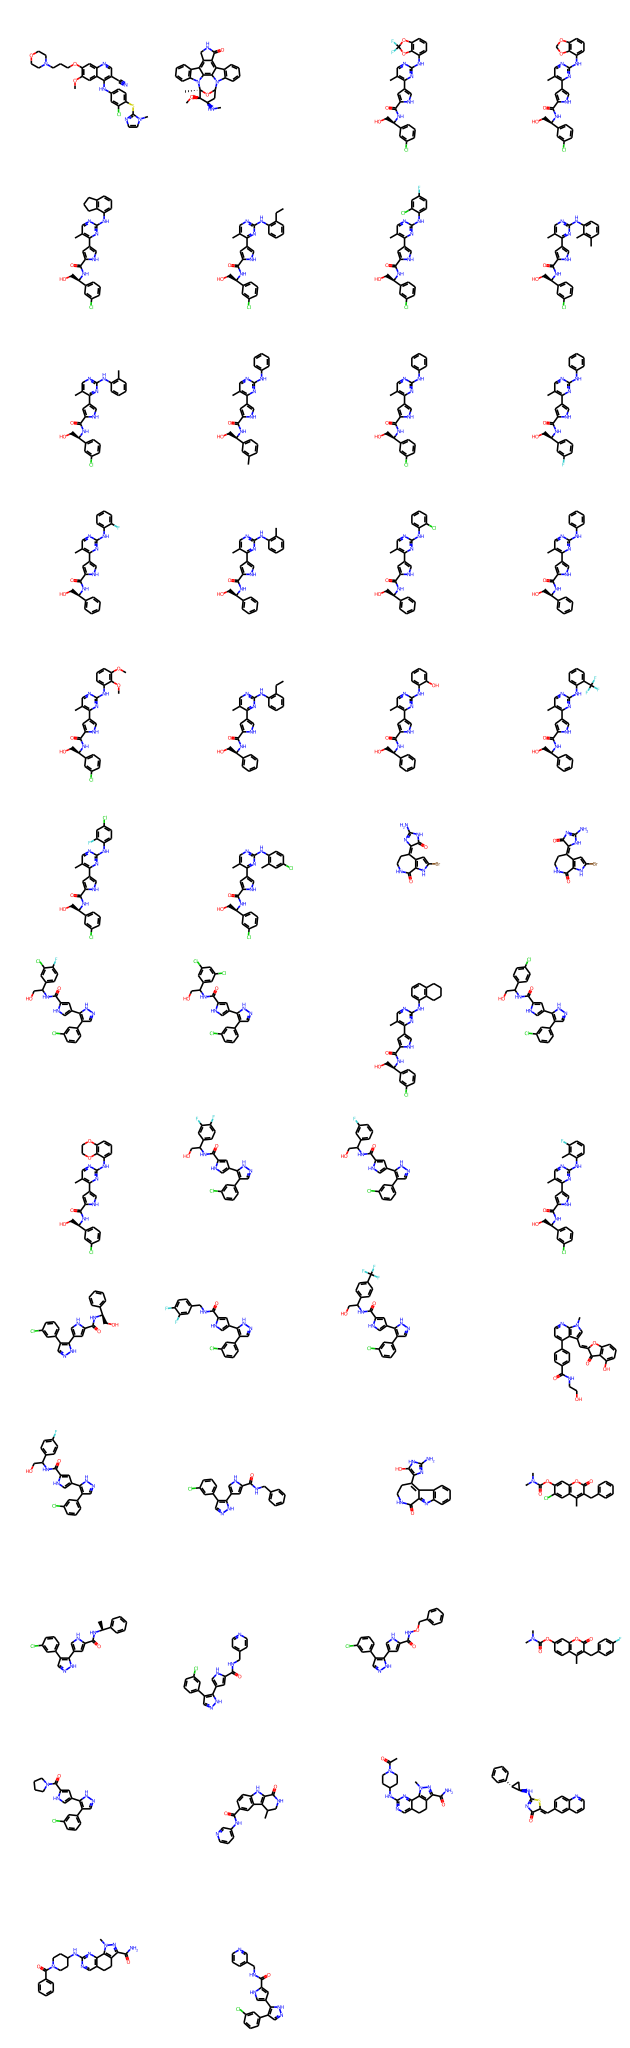

In [8]:
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

We can also use the [mols2grid](https://github.com/cbouy/mols2grid) Python library to generate a more flexible grid view that also allows selections. 

In [27]:
mols2grid.display(mols)

If we select a few of the checkboxes in the grid above, we can programatically get the selected cells. 

In [12]:
mols2grid.get_selection()

{0: 'COc1cc2c(Nc3ccc(Sc4nccn4C)c(Cl)c3)c(C#N)cnc2cc1OCCCN1CCOCC1',
 1: 'CN[C@@H]1CC2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4',
 2: 'Cc1cnc(Nc2cccc3c2OC(F)(F)O3)nc1-c1c[nH]c(C(=O)N[C@H](CO)c2cccc(Cl)c2)c1'}

### Using the RDKit With Pandas Dataframes
We can also read an SD file into a [Pandas](https://pandas.pydata.org/) dataframe.  The Pandas dataframe holds a data in a grid data structure that can be seen as similar to a spreadsheet. 

In [13]:
df = PandasTools.LoadSDF("example_compounds.sdf")

The **head** function of the Pandas dataframe displays the first five rows.  Note that when we read an SD file into a dataframe, the associated chemical structures are dispalyed when we display the dataframe. 

,ID,ROMol
0,168691 CHEMBL318804,
1,86358 CHEMBL162,
2,575087 CHEMBL576683,
3,575065 CHEMBL571484,
4,575047 CHEMBL568937,

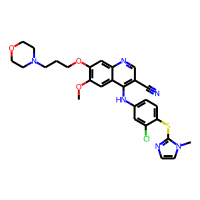
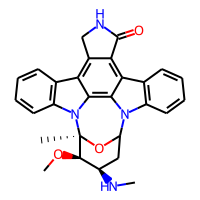
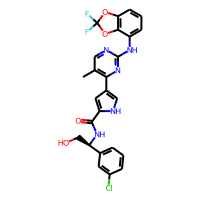
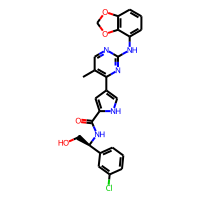
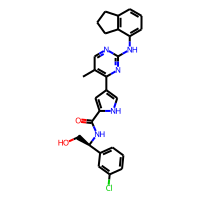

In [14]:
df.head()

### Adding Properties to a Pandas Dataframe
Let's add columns with molecular weight and LogP to the dataframe.

In [15]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

Displaying the dataframe shows the newly added columns. 

,ID,ROMol,MW,LogP
0,168691 CHEMBL318804,,565.099,5.49788
1,86358 CHEMBL162,,466.541,4.35400
2,575087 CHEMBL576683,,527.915,4.96202
3,575065 CHEMBL571484,,491.935,4.36922
4,575047 CHEMBL568937,,487.991,5.12922

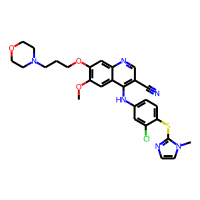
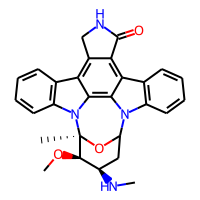
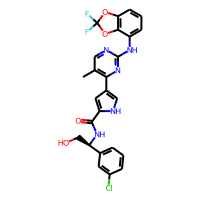
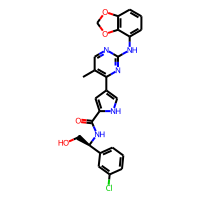
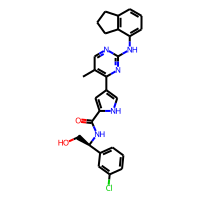

In [16]:
df.head()

### Plotting Property Data
It's easy to acess the data in the dataframe and use it do calaculations on generate plots.  For instance, we can use a boxplot to examine the distribution of molecular weight within the dataframe. 

In [17]:
import seaborn as sns

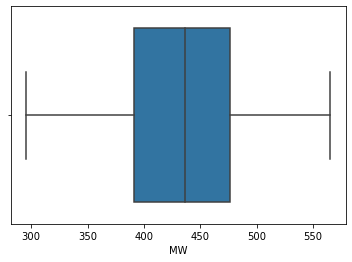

In [18]:
ax = sns.boxplot(x=df.MW)